In [1]:
# Imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.core.display import display
from statsmodels.stats.diagnostic import het_white

import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

from scipy import stats

# Radio Silence Analysis

## Dataframe loading

The following code loads the dataframe with community and smells information.

In [2]:
df = pd.read_csv(
    '../../data/df_with_geolocation/radio_with_geo_metrics.csv',
    sep=';'
)

df = df.dropna()
df = df.sort_values(['project_id', 'window_idx'], ascending=[True, True])

supreme_count = 0
for index, row in df.iterrows():
    countries = row['countries'].split(',')
    none_count = countries.count('None')

    if none_count / len(countries) >= 0:
        supreme_count += 1
    else:
        df.loc[index, 'countries'] = np.nan

df = df.dropna()
print(supreme_count)
display(df)

178


,row_id,totalcommits,project_id,owner_login,language,created_at,windows,window_idx,name,team,...,ivr_values,ivr_average,ivr_stdev,geo_distance,pdi_distance,idv_distance,mas_distance,uai_distance,ltowvs_distance,ivr_distance
97,739692,11874,10,chapuni,C++,2011-02-01 00:11:48,10,3,llvm,"114880,105944,669,875267,409239,701,2633,87535...",...,"68,68,42,68,68,68,20,40,68,68",57.800000,17.396040,2741.935084,20.841441,17.540525,14.141969,19.172757,24.774090,18.133289
158,739693,11874,10,chapuni,C++,2011-02-01 00:11:48,10,4,llvm,"669,748431,621228,493,692,144939,699,393486,10...",...,"68,68,71,68,68,68,68,42,68,68,40,69,68,20",61.000000,15.412283,2981.165771,18.826599,18.169667,12.897596,18.746756,23.181882,17.315065
159,739694,11874,10,chapuni,C++,2011-02-01 00:11:48,10,5,llvm,"114880,852462,593,105944,669,63043,980,409239,...",...,"69,68,68,42,68,68,20,40,68,68,68,68,68",60.230769,15.759409,2788.273109,19.307163,19.131656,13.442429,19.484617,24.066600,17.618142
124,739695,11874,10,chapuni,C++,2011-02-01 00:11:48,10,6,llvm,"669,748431,691902,692,105944,340770,547686,663...",...,"68,68,68,68,68,42,68,40,68,69,68,68,20",60.230769,15.759409,3048.958389,18.497239,19.610985,13.820648,20.018124,25.181816,17.618142
21,739696,11874,10,chapuni,C++,2011-02-01 00:11:48,10,7,llvm,"669,83936,748431,691902,692,144939,105944,1059...",...,"20,68,68,68,68,68,69,68,68,42,68,68,40,68,69,6...",60.047619,16.035823,2615.738250,20.210792,18.149677,12.252760,19.935102,20.618656,17.920815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,15064,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,4,openerp-addons,"6,1518312,694127,1699900,2252665,1658124,63158...",...,"48,57,20,57,57,57,66,68,48",53.111111,14.128380,2446.767012,14.241344,21.161285,7.642405,16.727128,14.844164,13.761229
25,15065,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,5,openerp-addons,"1468314,1059202,1577373,1476028,733989,631585,...",...,"48,31,57,20,66,57,59,57,66,48",50.900000,14.910474,2373.895318,14.168823,19.865457,12.439673,12.446248,11.297269,13.320524
130,15066,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,6,openerp-addons,"1468314,1025434,1577373,1972053,694127,89195,1...",...,"48,57,20,59,48,57,59,66,57,68",53.900000,13.519122,2681.819607,14.120406,19.612148,7.095453,13.620840,14.176806,13.428524
22,15067,2363,3085817,Akretion,Python,2012-10-11 16:44:29,7,7,openerp-addons,"1577373,694127,1002251,89195,1699900,688638,63...",...,"20,59,48,57,59,66,57,66",54.000000,14.870873,2583.157079,15.923096,18.681223,8.280787,12.004188,13.298367,15.011107


## Variables analysis and transformations

### Independent variables

178


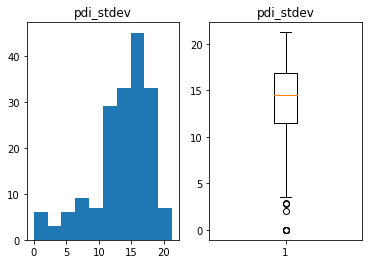

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


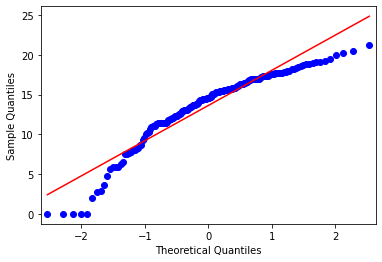

Shapiro-Wilk: Statistics = 0.907, p = 0.000
Agostino Test: Statistics = 37.408, p = 0.000
Min: 0.0, Max: 21.259171690176007


178


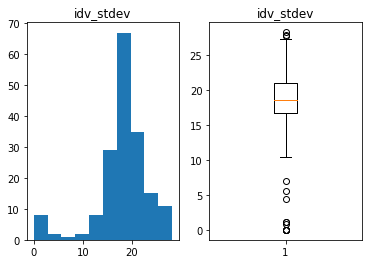

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


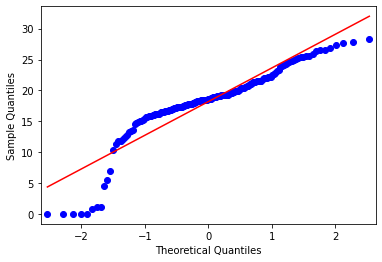

Shapiro-Wilk: Statistics = 0.860, p = 0.000
Agostino Test: Statistics = 59.475, p = 0.000
Min: 0.0, Max: 28.248631032240866


178


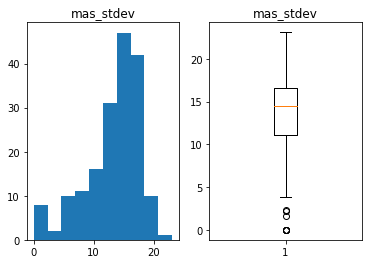

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


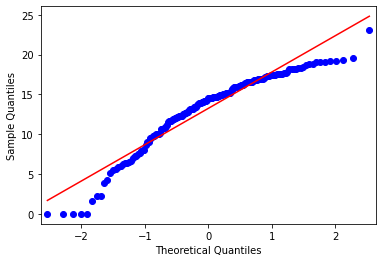

Shapiro-Wilk: Statistics = 0.920, p = 0.000
Agostino Test: Statistics = 27.860, p = 0.000
Min: 0.0, Max: 23.10098602994157


178


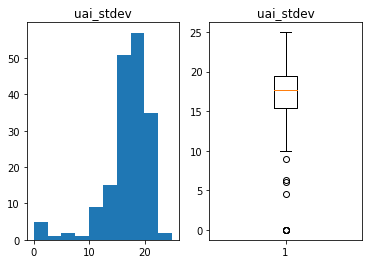

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


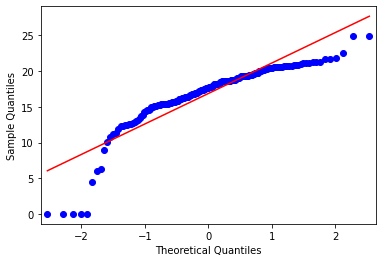

Shapiro-Wilk: Statistics = 0.826, p = 0.000
Agostino Test: Statistics = 86.667, p = 0.000
Min: 0.0, Max: 24.979634562121657


178


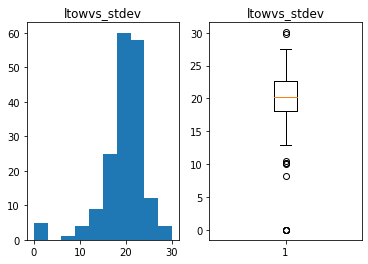

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


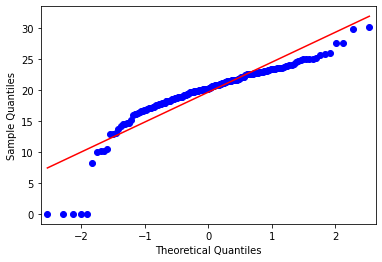

Shapiro-Wilk: Statistics = 0.836, p = 0.000
Agostino Test: Statistics = 87.691, p = 0.000
Min: 0.0, Max: 30.06342501794371


178


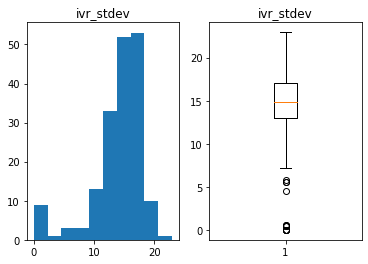

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


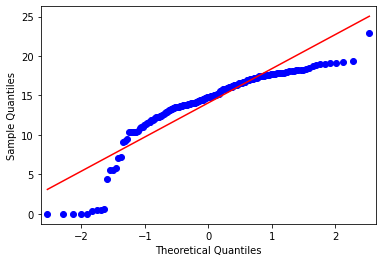

Shapiro-Wilk: Statistics = 0.833, p = 0.000
Agostino Test: Statistics = 66.994, p = 0.000
Min: 0.0, Max: 22.948181793315296


178


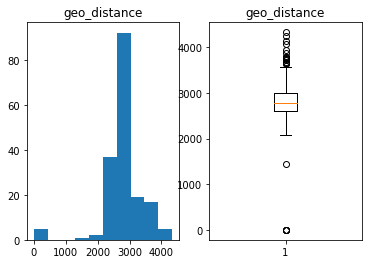

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


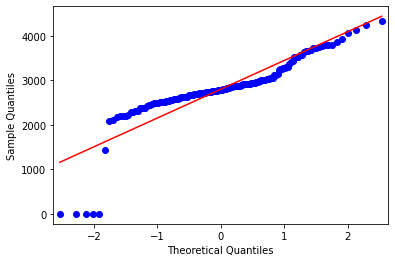

Shapiro-Wilk: Statistics = 0.790, p = 0.000
Agostino Test: Statistics = 92.471, p = 0.000
Min: 0.0, Max: 4331.831020883974




In [3]:
columns_independent = [
    "pdi_stdev", "idv_stdev", "mas_stdev", "uai_stdev", "ltowvs_stdev", "ivr_stdev", "geo_distance"
]

columns_control = [
    "totalCommitters", "turnover", "projectAge", "tenureDiversity", "tenureMedian",
    "stCongruence", "truckFactor", "centrality",
    "female", "blauGender", "teamSize", "totalcommits"
]

def check_normality(df):
    for column in df:
        column = df[column]

        # Histogram part
        print(len(column))
        fig, (ax_0, ax_1) = plt.subplots(1, 2)  # a figure with a single Axes an empty figure with no Axes
        fig.patch.set_facecolor('white')

        ax_0.hist(column)
        ax_0.set_title(column.name)

        ax_1.boxplot(column)
        ax_1.set_title(column.name)

        plt.show()

        fig, ax_2 = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
        fig.patch.set_facecolor('white')

        sm.qqplot(column, line="s", ax=ax_2)
        plt.show()

        # SHapiro-Wilk Test
        stat = stats.shapiro(column)
        print("Shapiro-Wilk: Statistics = %.3f, p = %.3f" % (stat.statistic, stat.pvalue))

        # Agostino test
        stat, p = stats.normaltest(column)
        print("Agostino Test: Statistics = %.3f, p = %.3f" % (stat, p))


        print(f"Min: {min(column)}, Max: {max(column)}\n\n")

check_normality(df[columns_independent])

### Control variables

178


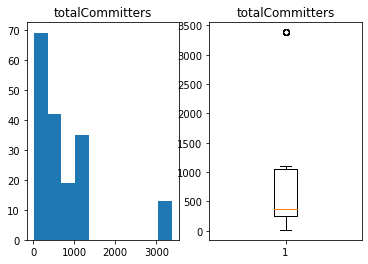

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


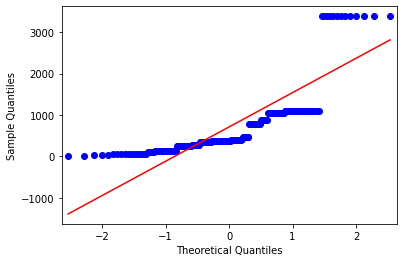

Shapiro-Wilk: Statistics = 0.657, p = 0.000
Agostino Test: Statistics = 98.653, p = 0.000
Min: 15, Max: 3384


178


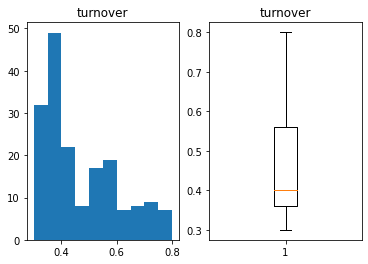

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


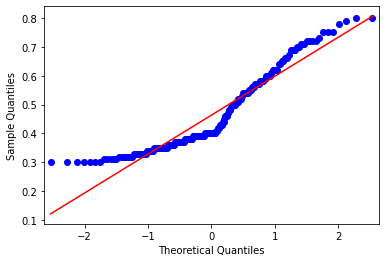

Shapiro-Wilk: Statistics = 0.894, p = 0.000
Agostino Test: Statistics = 19.096, p = 0.000
Min: 0.3, Max: 0.8


178


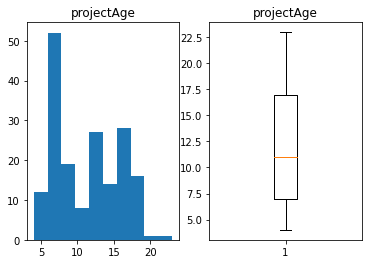

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


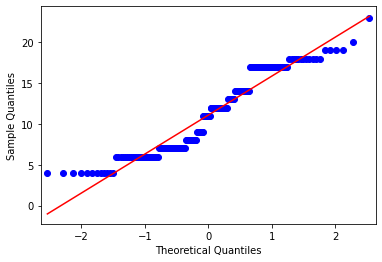

Shapiro-Wilk: Statistics = 0.915, p = 0.000
Agostino Test: Statistics = 102.599, p = 0.000
Min: 4, Max: 23


178


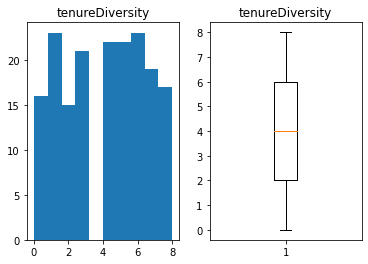

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


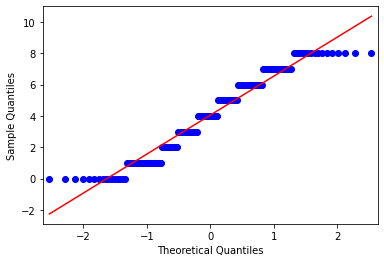

Shapiro-Wilk: Statistics = 0.938, p = 0.000
Agostino Test: Statistics = 63.653, p = 0.000
Min: 0, Max: 8


178


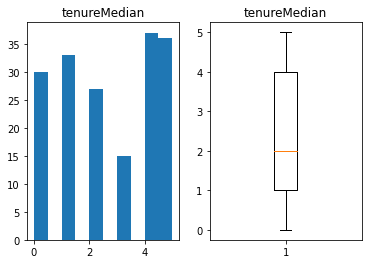

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


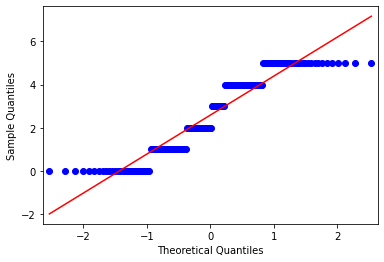

Shapiro-Wilk: Statistics = 0.881, p = 0.000
Agostino Test: Statistics = 668.860, p = 0.000
Min: 0, Max: 5


178


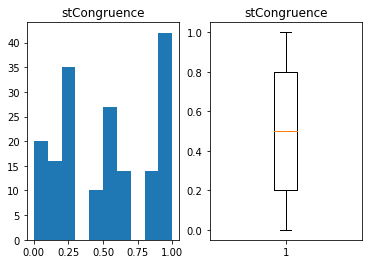

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


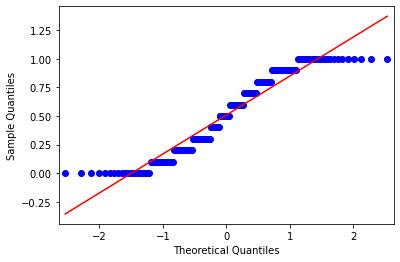

Shapiro-Wilk: Statistics = 0.914, p = 0.000
Agostino Test: Statistics = 276.413, p = 0.000
Min: 0.0, Max: 1.0


178


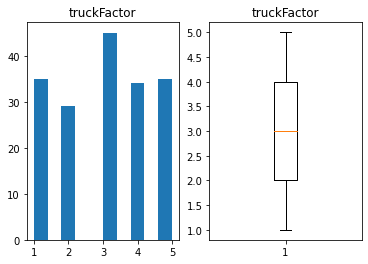

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


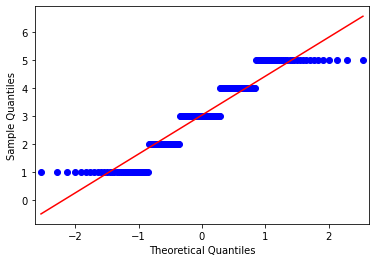

Shapiro-Wilk: Statistics = 0.892, p = 0.000
Agostino Test: Statistics = 81.388, p = 0.000
Min: 1, Max: 5


178


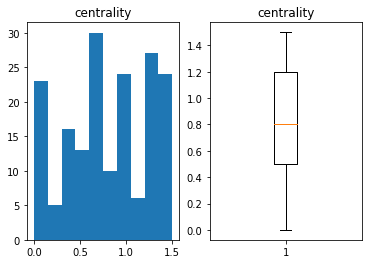

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


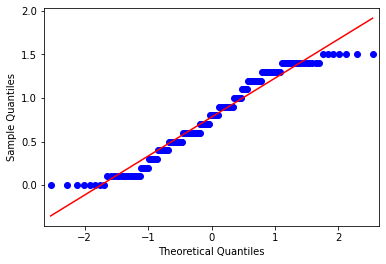

Shapiro-Wilk: Statistics = 0.947, p = 0.000
Agostino Test: Statistics = 54.486, p = 0.000
Min: 0.0, Max: 1.5


178


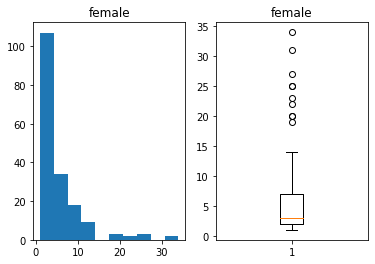

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


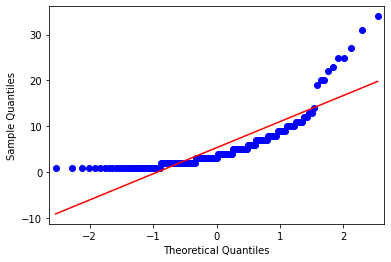

Shapiro-Wilk: Statistics = 0.702, p = 0.000
Agostino Test: Statistics = 115.065, p = 0.000
Min: 1, Max: 34


178


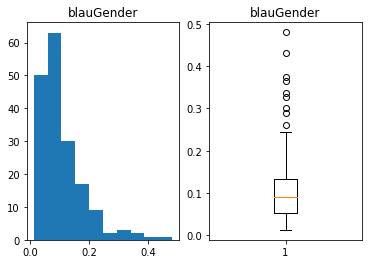

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


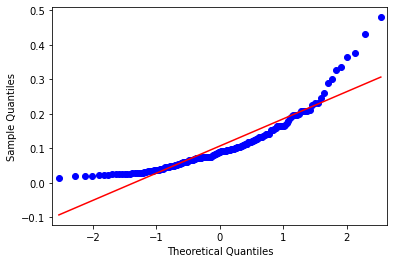

Shapiro-Wilk: Statistics = 0.836, p = 0.000
Agostino Test: Statistics = 80.879, p = 0.000
Min: 0.013, Max: 0.48


178


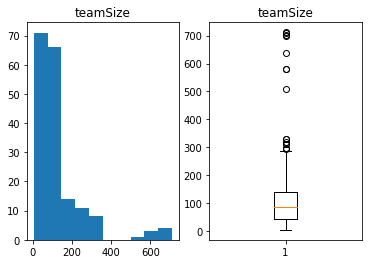

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


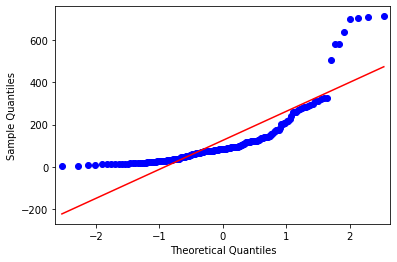

Shapiro-Wilk: Statistics = 0.699, p = 0.000
Agostino Test: Statistics = 114.814, p = 0.000
Min: 4, Max: 712


178


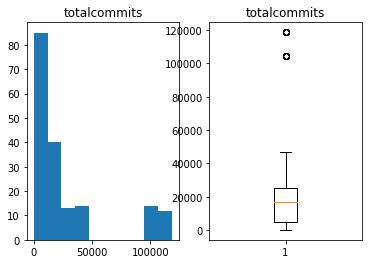

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


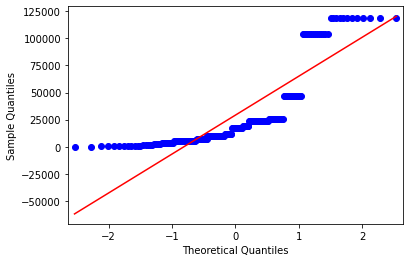

Shapiro-Wilk: Statistics = 0.700, p = 0.000
Agostino Test: Statistics = 52.114, p = 0.000
Min: 101, Max: 118673




In [4]:
check_normality(df[columns_control])

## Model construction

The following code creates the model.

In [5]:
df['totalCommitters'] = np.log2(df['totalCommitters'])
df['totalcommits'] = np.log2(df['totalcommits'])
df['teamSize'] = np.log2(df['teamSize'])

independent_vars_str = " + ".join(columns_independent)
control_vars_str = " + ".join(columns_control)

md = smf.mixedlm(f"radio ~ {independent_vars_str} + {control_vars_str}",
                 data=df,
                 groups=df["window_idx"])
mdf = md.fit(reml=False)

print(mdf.summary())

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  radio    
No. Observations:  178      Method:              ML       
No. Groups:        24       Scale:               0.6061   
Min. group size:   3        Log-Likelihood:      -208.0103
Max. group size:   13       Converged:           Yes      
Mean group size:   7.4                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -4.001    1.106 -3.618 0.000 -6.169 -1.833
pdi_stdev        0.070    0.029  2.443 0.015  0.014  0.126
idv_stdev       -0.054    0.025 -2.201 0.028 -0.103 -0.006
mas_stdev       -0.002    0.023 -0.067 0.947 -0.047  0.044
uai_stdev       -0.007    0.032 -0.208 0.835 -0.069  0.055
ltowvs_stdev     0.037    0.027  1.385 0.166 -0.015  0.089
ivr_stdev       -0.014    0.039 -0.346 0.729 -0.090  0.063
geo_dist

## Assumptions checks

The following code checks the MLL assumptions.

### Normality of residuals

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


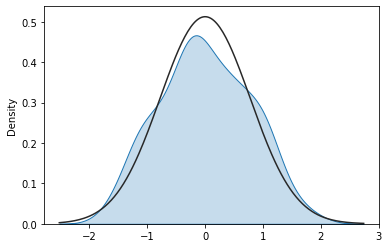

D:\Progetti\Python\rq_5_statistical_model\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


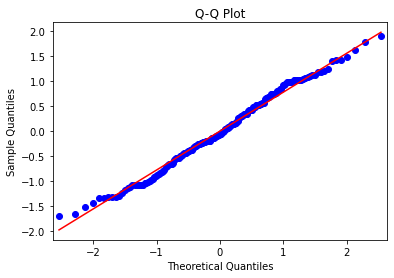

Statistic 0.9881475567817688
p-value 0.14178910851478577


In [6]:
fig, ax = plt.subplots(1, 1)  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

plt.show()

fig, ax = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

sm.qqplot(mdf.resid, dist = stats.norm, line = 's', ax=ax)

ax.set_title("Q-Q Plot")

plt.show()

labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(mdf.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

### Homoskedasticity of variance

LM Statistic 178.0
LM-Test p-value 0.4647493683956133
F-Statistic nan
F-Test p-value nan


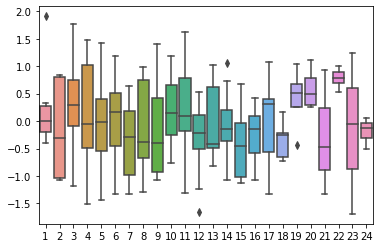

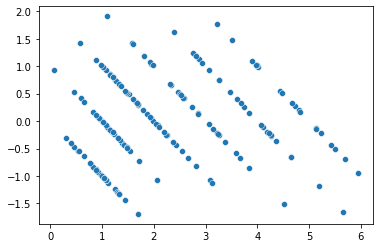

In [7]:
het_white_res = het_white(mdf.resid, mdf.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

fig, _ = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.boxplot(x = mdf.model.groups, y = mdf.resid)

ax.set_title("Distribution of Residuals for Weight by Litter")
ax.set_ylabel("Residuals")
ax.set_xlabel("Litter")

plt.show()

fig, _ = plt.subplots()  # a figure with a single Axes an empty figure with no Axes
fig.patch.set_facecolor('white')

sns.scatterplot(y = mdf.resid, x = mdf.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

plt.show()
